### The Data
This data is a csv file that contains two columns which are sentiment and comment. It categorises the Youtube comment as nostalgia or not nostalgia.

### Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

In [2]:
# Add a column for comment_length
data['comment_length'] = data['comment'].apply(len)

In [3]:
# Add a column for word_count
data['word_count'] = data['comment'].apply(lambda x: len(x.split()))

In [4]:
# Add a column that shows sentiment in either 0 or 1 
data['sentiment_code'] = data['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

In [5]:
# Show first ten rows of the dataset
data.head(10)

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   
9  not nostalgia  Elvis will always be number one no one can com...   

   comment_length  word_count  sentiment_code  
0             290          60               0  
1             129          26               1  
2             369          74               1  
3             332          68               0  
4              67          13               1  
5             205          39               1  
6             131          27               1  
7             162          34               1  
8              40           8               0  
9             106          22               0

In [6]:
# Show last ten rows of the dataset
data[-10:]

sentiment                                            comment  \
1490  not nostalgia  He really isn't my cup of tea, but some of his...   
1491      nostalgia  real music...how i miss those days...brings ba...   
1492      nostalgia  i used to cry over this song cause i had a boy...   
1493  not nostalgia  He really has that "love you like a brother" l...   
1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      comment_length  word_count  sentiment_code  
1490              91          18               0  
1491             123          23               1  
1492             176          39               1  
1493             211          42               0  
1494             185          35               0  
1495             171          25               0  
1496             110          22               0  
1497             109          23               0  
1498             330          62               1  
1499             218          43               1

In [7]:
# Show the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentiment       1500 non-null   object
 1   comment         1500 non-null   object
 2   comment_length  1500 non-null   int64 
 3   word_count      1500 non-null   int64 
 4   sentiment_code  1500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 58.7+ KB


In [8]:
# Check for missing data
data.isnull()

sentiment  comment  comment_length  word_count  sentiment_code
0         False    False           False       False           False
1         False    False           False       False           False
2         False    False           False       False           False
3         False    False           False       False           False
4         False    False           False       False           False
...         ...      ...             ...         ...             ...
1495      False    False           False       False           False
1496      False    False           False       False           False
1497      False    False           False       False           False
1498      False    False           False       False           False
1499      False    False           False       False           False

[1500 rows x 5 columns]

In [9]:
# import helper function
import helpers.data_mining_helpers as dmh

data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                       comment_length                          word_count  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                       sentiment_code  
0  The amoung of missing records is:   
1                                   0

In [10]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [11]:
# Check for any duplicate data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [12]:
sum(data.duplicated())

1

In [13]:
len(data)

1500

In [14]:
# Drop the duplicate data only
data.drop_duplicates(inplace=True)

In [15]:
sum(data.duplicated())

0

In [16]:
len(data) # After dropping one duplicated data

1499

### Data Preprocessing

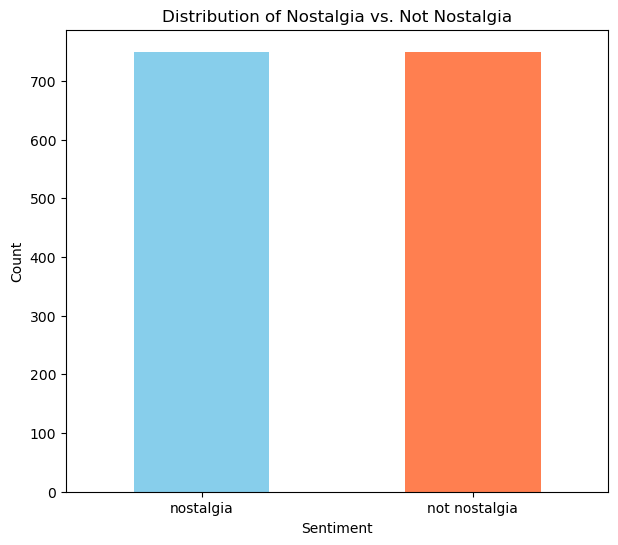

In [17]:
# Data visualization
import matplotlib.pyplot as plt

# Count for each categories
category_counts = data['sentiment'].value_counts()

# Plot a bar chart using matplotlib
plt.figure(figsize=(7, 6))
category_counts.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Distribution of Nostalgia vs. Not Nostalgia')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



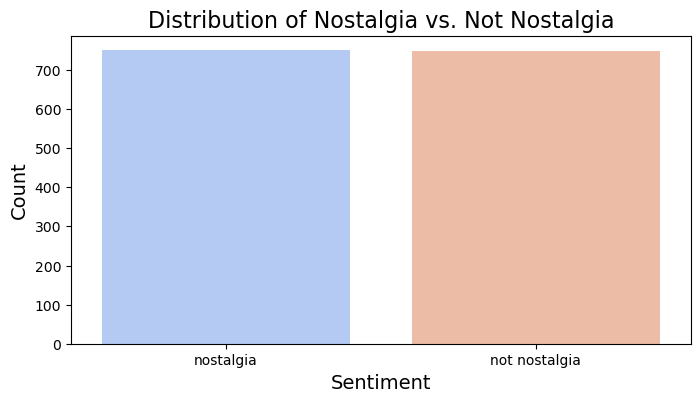

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a barchart using seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.title('Distribution of Nostalgia vs. Not Nostalgia', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [19]:
# Filter data to only include comments with more than 20 words
filtered_data = data[data['word_count'] > 20]

In [20]:
# Group by sentiment and calculate the average comment length for each group
avg_length_by_sentiment = data.groupby('sentiment')['comment_length'].mean()
print(avg_length_by_sentiment)


sentiment
nostalgia        137.490667
not nostalgia    127.368491
Name: comment_length, dtype: float64


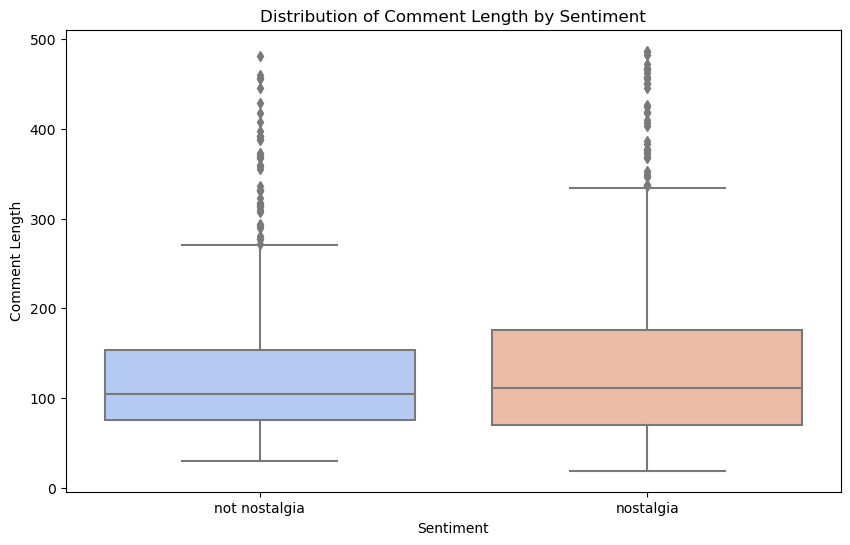

In [21]:
# Plot the distribution of comment lengths by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='comment_length', data=data, palette='coolwarm')
plt.title('Distribution of Comment Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.show()


### Feature Creation

In [22]:
import nltk

In [23]:
from nltk.tokenize import word_tokenize

# Apply tokenization to create a new feature called 'unigrams'
data['unigrams'] = data['comment'].apply(lambda x: dmh.tokenize_text(x))

In [24]:
data[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [25]:
data[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   comment_length  word_count  sentiment_code  \
0             290          60               0   
1             129          26               1   
2             369          74               1   
3             332          68               0   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [26]:
list(data[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### Feature Subset Selection

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data['comment']) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [28]:
count_vect.get_feature_names_out()[1598]

'he'

In [29]:
count_vect.get_feature_names_out()[3570]

'was'

In [30]:
count_vect.get_feature_names_out()[2973]

'singer'

In [31]:
count_vect.get_feature_names_out()[3650]

'with'

In [32]:
count_vect.get_feature_names_out()[1470]

'golden'

In [33]:
analyze = count_vect.build_analyzer()
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

In [34]:
analyze(data['comment'][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [35]:
X_counts.shape

(1499, 3730)

In [36]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [37]:
X_counts.shape

(1499, 3730)

In [38]:
# Convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [39]:
count_vect.get_feature_names_out()[0:1] # Showing the first token is '00'

array(['00'], dtype=object)

In [40]:
# tak tahu betul ke tak
import numpy as np

# Assuming 'count_vect' is your CountVectorizer instance and 'X_counts' is your document-term matrix
feature_names = count_vect.get_feature_names_out()

# Convert the first row to a dense array
first_row = X_counts[0].toarray().flatten()  # Flatten to convert to 1D

# Find the index of the first '1' in the first row
first_one_index = np.where(first_row == 1)[0][0]  # Get the index of the first '1'

# Retrieve the corresponding feature name
first_feature = feature_names[first_one_index]
print(f"The first '1' corresponds to the feature: {first_feature}")



The first '1' corresponds to the feature: 16years


In [41]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [42]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]

In [43]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

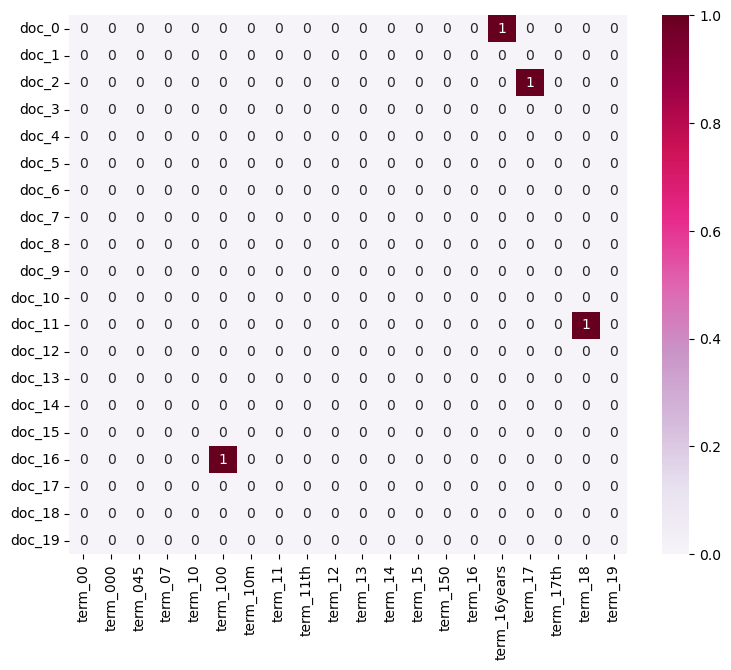

In [44]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

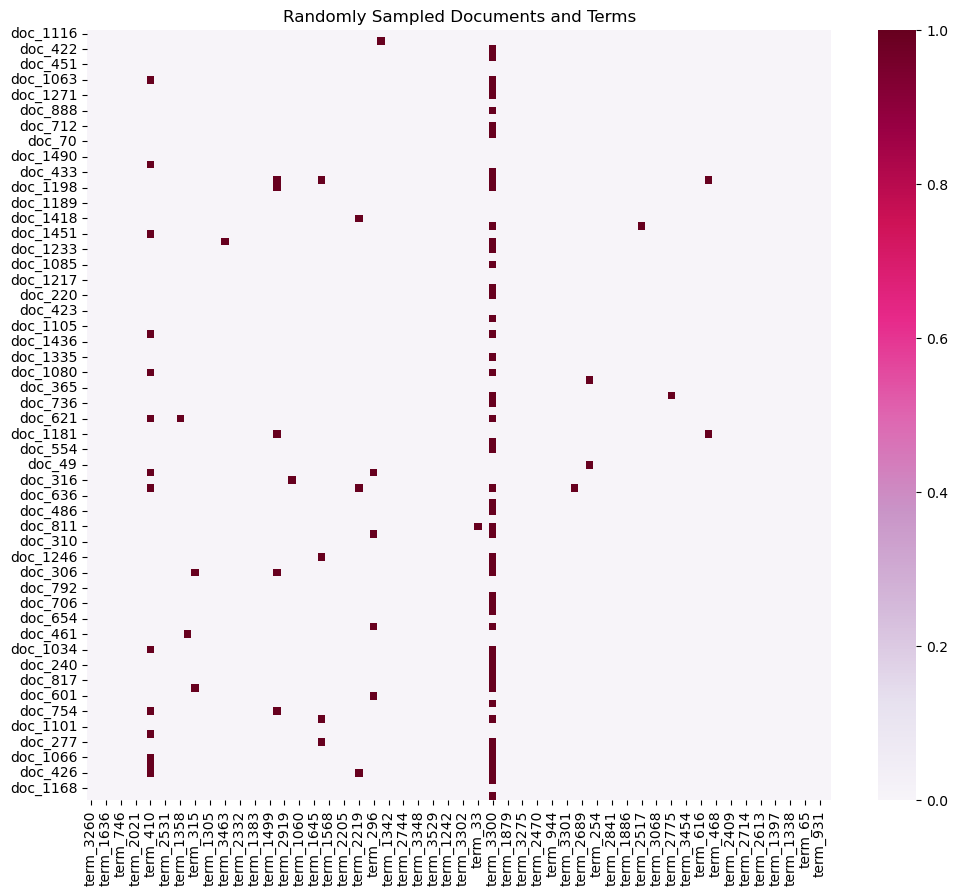

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

# Randomly sample 100 documents and 100 terms
sample_docs = np.random.choice(X_counts.shape[0], size=100, replace=False)
sample_term_indices = np.random.choice(X_counts.shape[1], size=100, replace=False)

plot_x = ["term_" + str(i) for i in sample_term_indices]
plot_y = ["doc_" + str(i) for i in sample_docs]
plot_z = X_counts[sample_docs, :][:, sample_term_indices].toarray()

# Covert to DataFrame
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt.title('Randomly Sampled Documents and Terms')
plt.show()


### Attribute Transformation / Aggregation

In [46]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [47]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [48]:
term_frequencies[0] # sum of first term: 00

1

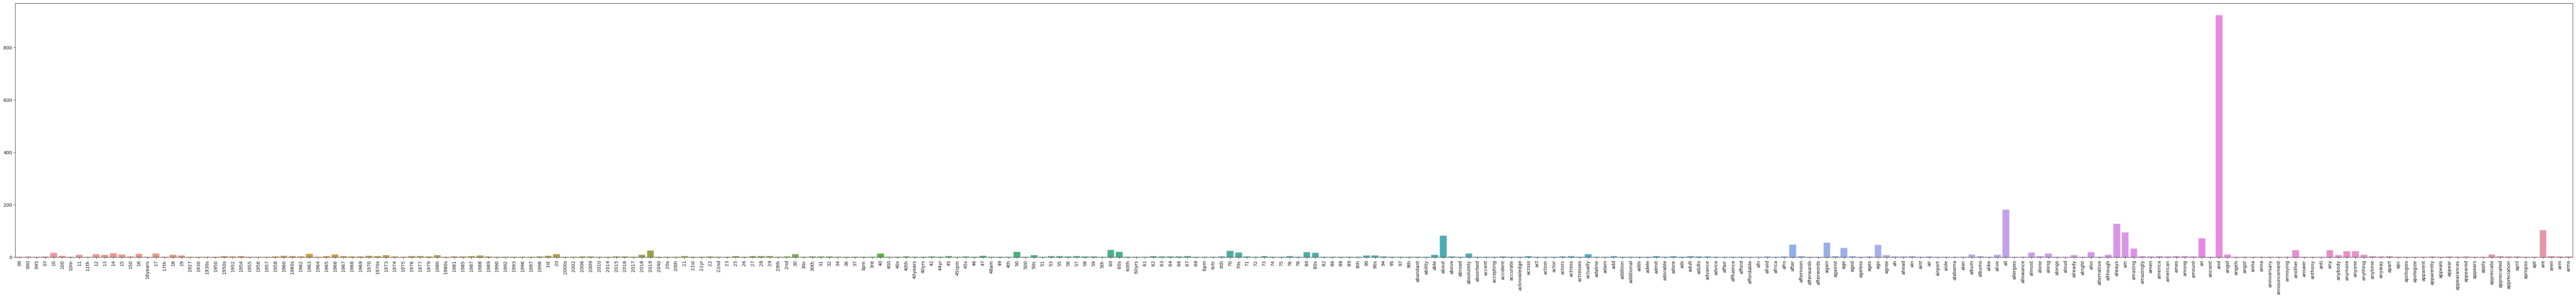

In [49]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [50]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

comments = data['comment']

# Use CountVectorizer to generate the document-term matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(comments)

# Compute term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize using Seaborn for the first 100 terms
plt.subplots(figsize=(20, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
                y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation=90)
plt.title('Term Frequencies for the First 100 Terms')
plt.show()


In [52]:
# Get the top 100 most frequent terms
N = 100
top_n_indices = np.argsort(term_frequencies)[-N:][::-1]
top_n_terms = count_vect.get_feature_names_out()[top_n_indices]
top_n_frequencies = term_frequencies[top_n_indices]

# Create a DataFrame
df_top_terms = pd.DataFrame({
    'Term': top_n_terms,
    'Frequency': top_n_frequencies
})

# Plot using Plotly
fig = px.bar(df_top_terms, 
             x='Term', 
             y='Frequency', 
             title=f'Top {N} Most Frequent Terms',
             labels={'Term': 'Word', 'Frequency': 'Count'})
fig.show()


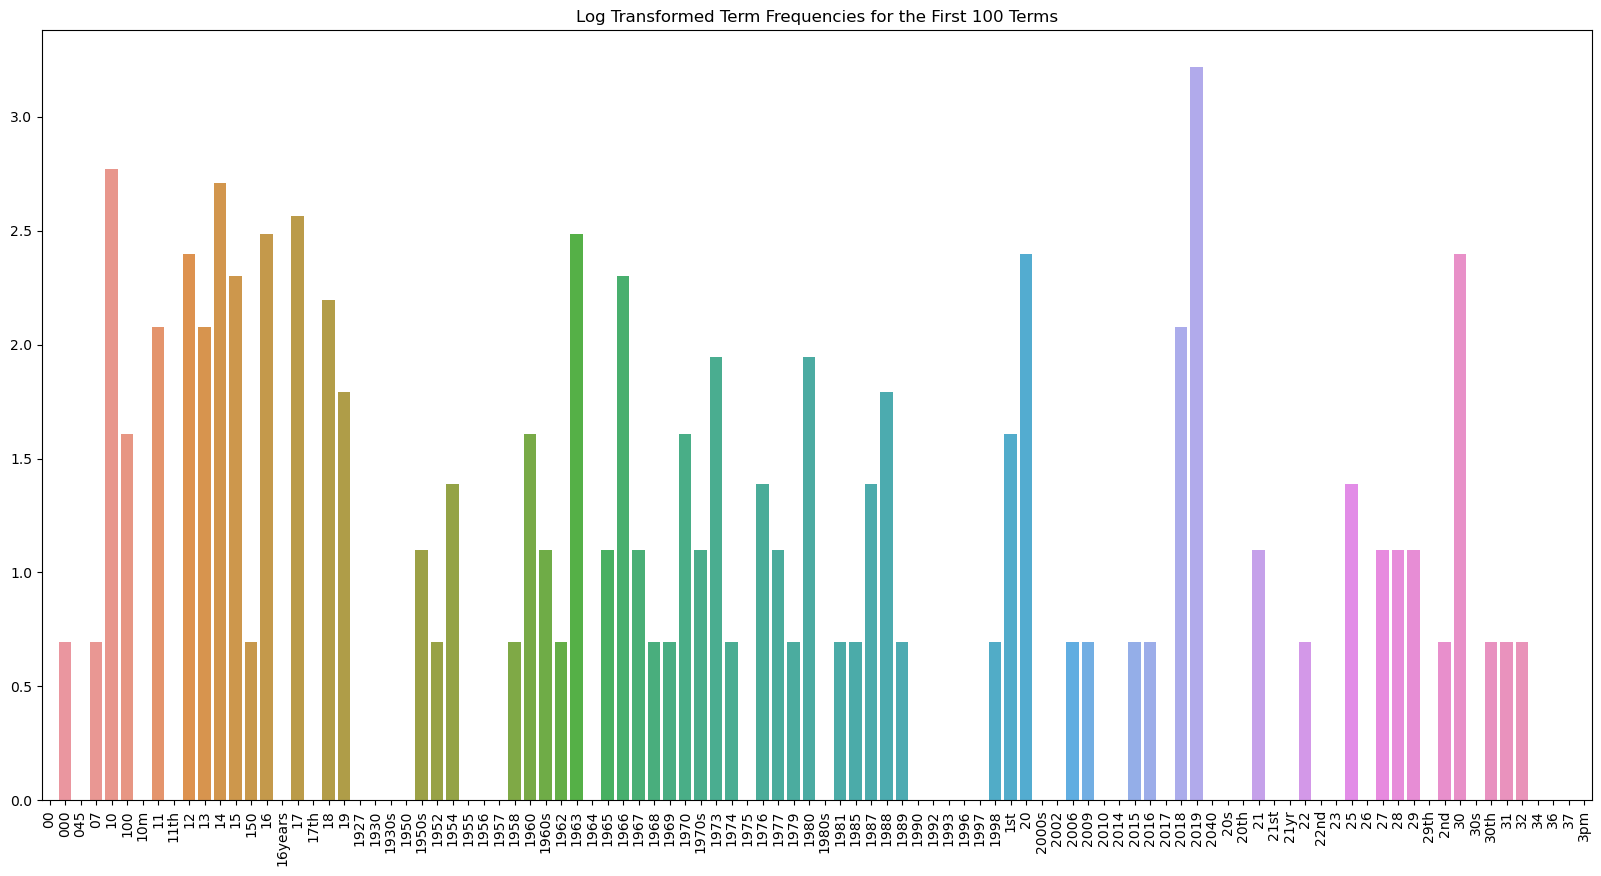

In [53]:
import math
term_frequencies_log = [math.log(i) if i > 0 else 0 for i in term_frequencies]

plt.subplots(figsize=(20, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation=90)
plt.title('Log Transformed Term Frequencies for the First 100 Terms')
plt.show()


### Finding Frequent Pattern

In [54]:
from collections import Counter

# Flatten the list of unigrams for all comments
all_unigrams = [word for unigrams in data['unigrams'] for word in unigrams]

# Count the frequency of each unigram
word_freq = Counter(all_unigrams)

# Display the most common words
word_freq.most_common(10)

# Convert the Counter object to a DataFrame for easier plotting
word_freq_df = pd.DataFrame(word_freq.most_common(30), columns=['Word', 'Frequency'])

# Plot the frequency of the most common words
plt.figure(figsize=(14, 7))
word_freq_df.plot(kind='bar', x='Word', y='Frequency', legend=False, title='Top 30 Most Common Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


<Figure size 1400x700 with 0 Axes>

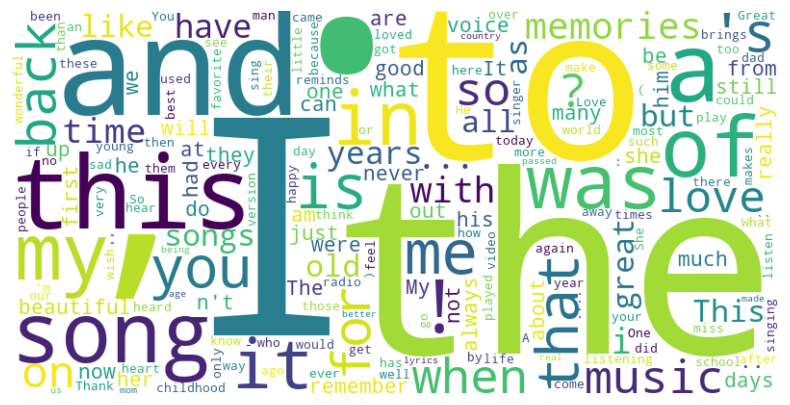

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [56]:
# Calculate the number of unique words
unique_words = set(word for tokens in data['unigrams'] for word in tokens)

# Show the number of unique words
print(f"Number of unique words: {len(unique_words)}")

# Show ten examples of the unique words
print(list(unique_words)[:10])


Number of unique words: 4693
['untimely', 'Montgomery', 'wood', 'concert', 'Distant', 'north', 'lump', 'Eckstein', 'long', 'gem']


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your dataset is loaded into a DataFrame called `df`
# df['comment'] contains the YouTube comments, and df['sentiment'] contains the sentiment labels

# Create a CountVectorizer instance
count_vect = CountVectorizer()

# Transform the comments into a document-term matrix
X_counts = count_vect.fit_transform(data['comment'])

# Get the words from the vocabulary
words = count_vect.get_feature_names_out()

# Convert the matrix to a DataFrame for easy manipulation
term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

# Adding the sentiment labels back to the DataFrame
term_document_df['sentiment'] = data['sentiment']


In [58]:
# Convert the DataFrame values to numeric (if they are strings)
term_document_df = term_document_df.apply(pd.to_numeric, errors='coerce')

transactions = []
for i, row in term_document_df.iterrows():
    transaction = list(row[row > 0].index)  # Get all the words present in the comment
    transactions.append(transaction)



In [59]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each sentiment category
sentiments = data['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = data[data['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer(ngram_range=(1, 3), max_features=1000, stop_words='english')  # Use bigrams and trigrams
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [60]:
# Display the filtered DataFrame for one of the sentiments
sentiment_label = 'nostalgia'  
print(f"Filtered Term-Document Frequency DataFrame for Sentiment '{sentiment_label}':")
filt_term_document_dfs[sentiment_label]

Filtered Term-Document Frequency DataFrame for Sentiment 'nostalgia':


07  10  10 years  10 years old  11  12  12 years  12 years old  13  14  \
0     0   0         0             0   0   0         0             0   0   0   
1     0   0         0             0   0   0         0             0   0   0   
2     0   0         0             0   0   0         0             0   0   0   
3     0   0         0             0   0   0         0             0   0   0   
4     0   0         0             0   0   0         0             0   0   0   
..   ..  ..       ...           ...  ..  ..       ...           ...  ..  ..   
745   0   0         0             0   0   0         0             0   0   0   
746   0   0         0             0   0   0         0             0   0   0   
747   0   0         0             0   0   0         0             0   1   0   
748   0   0         0             0   0   0         0             0   0   0   
749   0   0         0             0   0   0         0             0   0   0   

     ...  yesterday  yesterday best  young  young boy  young remember  \
0    ...          0               0      0          0               0   
1    ...          0               0      0          0               0   
2    ...          0               0      0          0               0   
3    ...          0               0      0          0               0   
4    ...          0               0      0          0               0   
..   ...        ...             ...    ...        ...             ...   
745  ...          0               0      0          0               0   
746  ...          0               0      0          0               0   
747  ...          0               0      0          0               0   
748  ...          0               0      0          0               0   
749  ...          0               0      0          0               0   

     younger  younger days  youth  youtube  yrs  
0          0             0      0        0    0  
1          0             0      0        0    0  
2          0             0      0        0    0  
3          0             0      0        0    0  
4          0             0      0        0    0  
..       ...           ...    ...      ...  ...  
745        0             0      0        0    0  
746        0             0      0        0    0  
747        0             0      0        0    0  
748        0             0      0        0    0  
749        0             0      0        0    0  

[750 rows x 1000 columns]

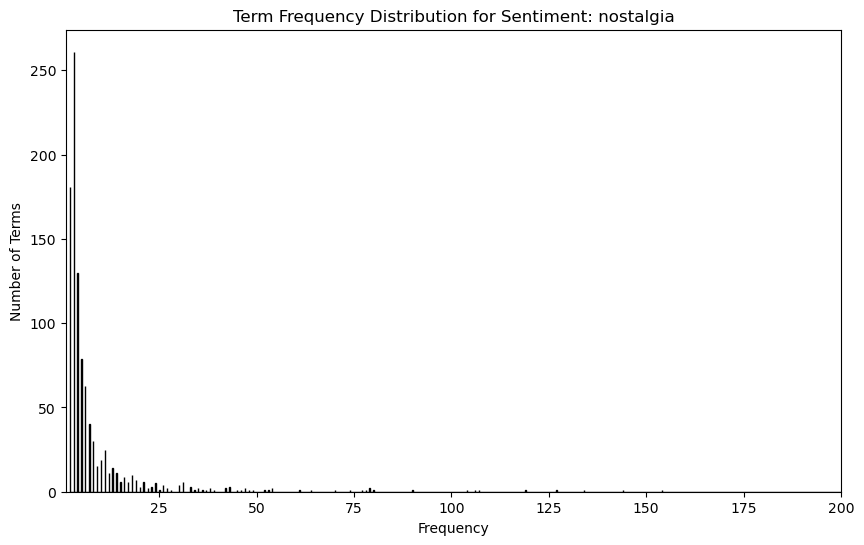

In [61]:
# Sum over all documents to get total frequency for each word
sentiment_label = 'nostalgia' 
word_counts = filt_term_document_dfs[sentiment_label].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='black', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment: {sentiment_label}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)  
plt.show()


In [62]:
sentiment_label = 'nostalgia'  
word_counts = filt_term_document_dfs[sentiment_label].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment_label].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiment_label}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: nostalgia
Number of terms in top 5%: 50
Filtered terms: ['song', 'memories', 'years', 'love', 'time', 'remember', 'old', 'music', 'great', 'brings', 'beautiful', 'days', 'good', 'miss', 'songs', 'childhood', 'reminds', 'just', 'dad', 'listening', 'loved', 'like', 'used', 'school', 'voice', 'years old', 'heard', 'times', 'listen', 'young', 'hear', 'played', 'best', 'sing', 'thank', 'life', 'thanks', 'happy', 'radio', 'ago', 'really', 'brings memories', 'mum', 'play', 'mom', 'day', 'love song', 'passed', 'singing', 'came']


In [63]:
sorted_counts # the frequencies are sorted in a descending order

array([440, 240, 154, 144, 134, 127, 119, 107, 106, 104,  90,  80,  79,
        79,  78,  77,  74,  70,  64,  61,  54,  54,  53,  52,  49,  48,
        47,  47,  46,  45,  43,  43,  43,  42,  42,  39,  38,  38,  37,
        36,  35,  35,  34,  33,  33,  33,  31,  31,  31,  31,  31,  31,
        30,  30,  30,  30,  28,  27,  27,  26,  26,  26,  26,  25,  24,
        24,  24,  24,  24,  23,  23,  23,  22,  22,  21,  21,  21,  21,
        21,  21,  20,  20,  20,  19,  19,  19,  19,  19,  19,  19,  18,
        18,  18,  18,  18,  18,  18,  18,  18,  18,  17,  17,  17,  17,
        17,  17,  16,  16,  16,  16,  16,  16,  16,  16,  16,  15,  15,
        15,  15,  15,  15,  14,  14,  14,  14,  14,  14,  14,  14,  14,
        14,  14,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,
        13,  13,  13,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,
        11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  1

In [64]:
sorted_indices # indices corresponding to the words after being sorted in a descending order

array([779, 568, 982, 534, 876, 707, 630, 607, 372, 162,  98, 260, 353,
       588, 813, 220, 728, 435, 242, 508, 542, 493, 941, 757, 950, 985,
       402, 896, 504, 992, 400, 680, 116, 764, 857, 488, 859, 393, 693,
        72, 697, 178, 604, 677, 596, 258, 539, 663, 769, 204, 970, 557,
       806, 514, 309, 844, 964, 980, 900,  87, 523, 453, 423, 983, 219,
       361, 745, 582, 102, 410, 684, 158, 264, 356, 411, 704, 784,  59,
       841, 281, 548, 340, 627, 624,  53, 977, 314, 958, 658, 375, 854,
       406, 231, 464, 701, 351, 505, 424, 308, 373, 477, 990, 268, 976,
       531,  36, 767, 623, 506, 561, 666, 632, 602, 516, 403, 750, 385,
        71, 149, 250, 237, 803, 274, 849, 193, 556, 772, 594, 357, 404,
       667, 395,  60,   1, 304, 358, 664, 946, 554, 326, 737, 401, 867,
       265,  46,  62, 254, 289, 345, 210, 512, 726,  88, 381, 997,  64,
       306, 920, 645, 961, 145, 975, 475, 168,  23, 953, 718, 190,  99,
       133, 450,   9, 226,  55, 530, 417, 618, 457, 348, 944, 62

In [65]:
filt_term_document_dfs[sentiment_label].loc[:,'song'].sum(axis=0) # sum up the column corresponding to the top 5% words


440

In [66]:
sentiment_label = 'nostalgia'  
word_counts = filt_term_document_dfs[sentiment_label].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = max(1, int(0.01 * total_terms))  # Ensure at least one term is selected

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiment_label].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Sentiment: {sentiment_label}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: nostalgia
Number of terms in bottom 1%: 10
Filtered terms: ['07', 'big sister', 'life simpler', 'billy eckstine', 'birthday', 'bitter', 'black', 'blast', 'blast past', 'life sweet']


In [67]:
sorted_counts # the frequencies are sorted in an ascending order

array([  2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   

In [68]:
sorted_indices # indices corresponding to the words after being sorted in an ascending order

array([  0, 134, 491, 136, 137, 138, 139, 140, 141, 492, 494, 277, 144,
       497, 147, 148, 498, 501, 151, 152, 502, 503, 155, 495, 157, 132,
       130, 106, 107, 780, 109, 283, 111, 112, 486, 114, 115, 490, 117,
       120, 121, 122, 123, 489, 125, 126, 127, 128, 129, 280, 159, 723,
       722, 209, 656, 211, 654, 653, 652, 650, 647, 646, 643, 657, 637,
       635, 634, 633, 631, 629, 628, 626, 622, 611, 619, 636, 207, 206,
       205, 721, 720, 719, 716, 714, 175, 176, 177, 179, 180, 182, 185,
       186, 188, 189, 191, 197, 198, 199, 200, 201, 203, 659, 105, 104,
       118, 284, 897, 895, 893, 892, 891, 434, 888, 887, 436, 437, 884,
       919, 881, 879, 439, 874, 873, 781, 871, 898, 433, 918, 916, 915,
       924, 928, 929, 931, 933, 934, 911, 910, 907, 906, 936, 937, 940,
       903, 899, 870, 438, 866, 462, 869, 463, 465, 466, 468, 470, 460,
       474,  94, 480,  96, 482, 785, 100, 101, 476, 459, 923, 455, 447,
       445, 443, 442, 448, 446, 451, 449, 454, 441, 440, 862, 37

In [69]:
filt_term_document_dfs[sentiment_label].loc[:,'life sweet'].sum(axis=0) # sum up the column corresponding to the bottom 1% words

2

In [70]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')  # Print the bottom percentage words
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')  # Print the top percentage words
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment label
sentiment_labels = ['nostalgia', 'not nostalgia']
filtered_term_document_dfs = {}

for sentiment_label in sentiment_labels:
    print(f'\nFor sentiment "{sentiment_label}", the following words are filtered:')
    filtered_term_document_dfs[sentiment_label] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment_label])

# Example: Display the filtered DataFrame for one of the sentiments
selected_sentiment = 'nostalgia' 
print(f"\nFiltered Term-Document Frequency DataFrame for Sentiment '{selected_sentiment}':")
filtered_term_document_dfs[selected_sentiment]



For sentiment "nostalgia", the following words are filtered:
Bottom 1.0% words: 
07                2
big sister        2
life simpler      2
billy eckstine    2
birthday          2
bitter            2
black             2
blast             2
blast past        2
life sweet        2
dtype: int64
Top 5.0% words: 
came                31
singing             31
passed              31
love song           31
day                 33
mom                 33
play                33
mum                 34
brings memories     35
really              35
ago                 36
radio               37
happy               38
thanks              38
life                39
thank               42
sing                42
best                43
played              43
hear                43
young               45
listen              46
times               47
heard               47
years old           48
voice               49
school              52
used                53
like                54
loved               5

10  10 years  10 years old  11  12  12 years  12 years old  13  14  \
0     0         0             0   0   0         0             0   0   0   
1     0         0             0   0   0         0             0   0   0   
2     0         0             0   0   0         0             0   0   0   
3     0         0             0   0   0         0             0   0   0   
4     0         0             0   0   0         0             0   0   0   
..   ..       ...           ...  ..  ..       ...           ...  ..  ..   
745   0         0             0   0   0         0             0   0   0   
746   0         0             0   0   0         0             0   0   0   
747   0         0             0   0   0         0             0   1   0   
748   0         0             0   0   0         0             0   0   0   
749   0         0             0   0   0         0             0   0   0   

     14 years  ...  yes  yesterday  yesterday best  young boy  young remember  \
0           0  ...    0          0               0          0               0   
1           0  ...    0          0               0          0               0   
2           0  ...    0          0               0          0               0   
3           0  ...    0          0               0          0               0   
4           0  ...    0          0               0          0               0   
..        ...  ...  ...        ...             ...        ...             ...   
745         0  ...    0          0               0          0               0   
746         0  ...    0          0               0          0               0   
747         0  ...    0          0               0          0               0   
748         0  ...    0          0               0          0               0   
749         0  ...    0          0               0          0               0   

     younger  younger days  youth  youtube  yrs  
0          0             0      0        0    0  
1          0             0      0        0    0  
2          0             0      0        0    0  
3          0             0      0        0    0  
4          0             0      0        0    0  
..       ...           ...    ...      ...  ...  
745        0             0      0        0    0  
746        0             0      0        0    0  
747        0             0      0        0    0  
748        0             0      0        0    0  
749        0             0      0        0    0  

[750 rows x 940 columns]

In [71]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of filtered_term_document DataFrames
for sentiment in filtered_term_document_dfs:
    # Replace dots with underscores in the sentiment label to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    obj = DF2DB(filt_term_document_dfs[sentiment])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)



Database size (total no of transactions) : 750
Number of items : 1000
Minimum Transaction Size : 1
Average Transaction Size : 11.469333333333333
Maximum Transaction Size : 35
Standard Deviation Transaction Size : 6.288910310132343
Variance in Transaction Sizes : 39.6031971517579
Sparsity : 0.9885306666666667


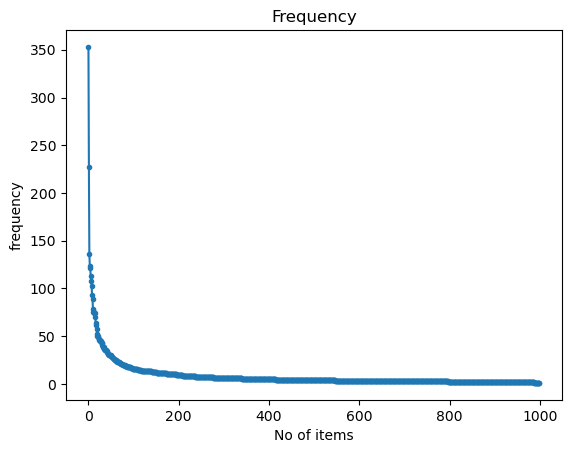

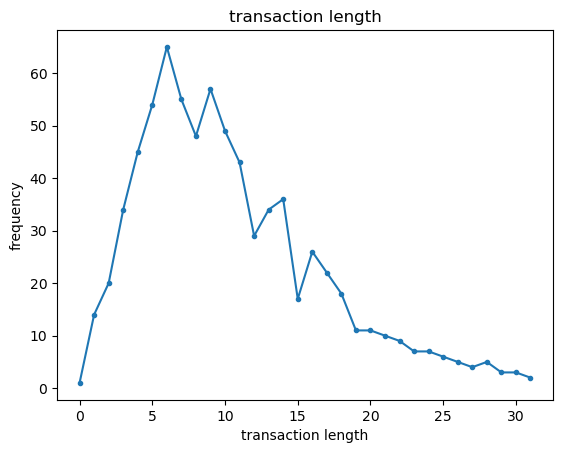

In [72]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv'  )
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 749
Number of items : 1000
Minimum Transaction Size : 1
Average Transaction Size : 8.813084112149532
Maximum Transaction Size : 38
Standard Deviation Transaction Size : 4.978435711188991
Variance in Transaction Sizes : 24.817956919386276
Sparsity : 0.9911869158878505


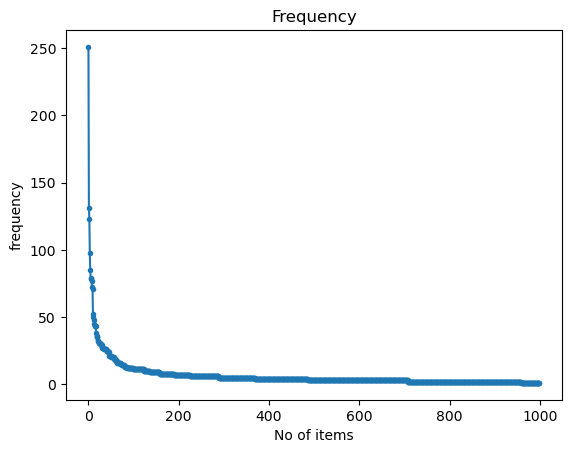

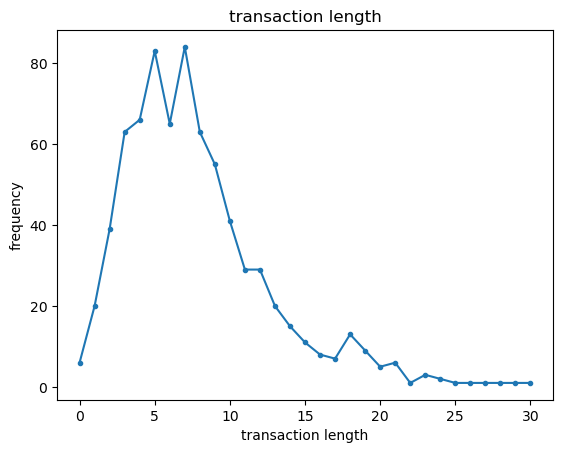

In [73]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [74]:
# Mining frequent patterns for nostalgia
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns (Nostalgia): ' + str(len(frequentPatternsDF_nostalgia))) # print the total number of patterns
print('Runtime (Nostalgia): ' + str(obj1.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns (Nostalgia): 781
Runtime (Nostalgia): 0.07282233238220215


In [75]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') # save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0              song came        9
1         song came song        9
2         song came came        9
3    song song came came        9
4                   sure        9
..                   ...      ...
776  years memories song       20
777           years song       74
778             memories      227
779        memories song      108
780                 song      353

[781 rows x 2 columns]

In [76]:
# Mining frequent patterns for not nostalgia
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia = obj2.getPatternsAsDataFrame()  # Correct object used here
print('Total No of patterns (Not Nostalgia): ' + str(len(frequentPatternsDF_not_nostalgia))) # print the total number of patterns
print('Runtime (Not Nostalgia): ' + str(obj2.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns (Not Nostalgia): 279
Runtime (Not Nostalgia): 0.037903785705566406


In [77]:
obj2.save('freq_patterns_not nostalgia_minSup9.txt') # save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0          favorites        9
1            special        9
2          years old        9
3      years old old        9
4    years old years        9
..               ...      ...
274  music song love       10
275       music love       25
276             love      131
277        love song       65
278             song      251

[279 rows x 2 columns]

In [78]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

           Patterns  Support
589        memories      227
576        remember      121
590   memories song      108
539          brings      103
504       childhood       75
..              ...      ...
417       like time        9
422  like just song        9
424   like old song        9
429        dad time        9
355  hear time song        9

[711 rows x 2 columns]
Number of patterns discarded: 349


In [79]:
# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(data['comment'])
terms = count_vect.get_feature_names_out()

# Tokenize the comments into sets of unique words
data['tokenized_comment'] = data['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized comment
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  voice memories  \
0      0    0    0   0   0    0    0   0     0   0  ...               0   
1      0    0    0   0   0    0    0   0     0   0  ...               0   
2      0    0    0   0   0    0    0   0     0   0  ...               0   
3      0    0    0   0   0    0    0   0     0   0  ...               0   
4      0    0    0   0   0    0    0   0     0   0  ...               0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...             ...   
1495   0    0    0   0   0    0    0   0     0   0  ...               0   
1496   0    0    0   0   0    0    0   0     0   0  ...               0   
1497   0    0    0   0   0    0    0   0     0   0  ...               0   
1498   0    0    0   0   0    0    0   0     0   0  ...               0   
1499   0    0    0   0   0    0    0   0     0   0  ...               0   

      school remember  school memories  school time  like songs  like time  \
0                   0                0            0           0          0   
1                   0                0            0           0          0   
2                   0                0            0           0          0   
3                   0                0            0           0          0   
4                   0                0            0           0          0   
...               ...              ...          ...         ...        ...   
1495                0                0            0           0          0   
1496                0                0            0           0          0   
1497                0                0            0           0          1   
1498                0                0            0           0          0   
1499                0                0            0           0          0   

      like just song  like old song  dad time  hear time song  
0                  0              0         0               0  
1                  0              0         0               0  
2                  0              0         0               0  
3                  0              0         0               0  
4                  0              0         0               0  
...              ...            ...       ...             ...  
1495               0              0         0               0  
1496               0              0         0               0  
1497               0              0         0               0  
1498               0              0         0               0  
1499               0              0         0               0  

[1499 rows x 4441 columns]

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Feature Extraction with Bigrams and Trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['comment'])

# Applying Dimensionality Reduction
X_pca = PCA(n_components=2).fit_transform(X.toarray())
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.toarray())
X_umap = umap.UMAP(n_components=2).fit_transform(X.toarray())

In [81]:
X_pca.shape

(1499, 2)

In [82]:
X_tsne.shape

(1499, 2)

In [89]:
X_umap.shape

(1499, 2)

In [90]:
# Plot the results in subplots for PCA, t-SNE, and UMAP
col = ['coral', 'blue']
categories = data['sentiment'].unique()  

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        # Get the indices for the current category
        indices = data['sentiment'] == category
        xs = X_reduced[indices][:, 0]  # X-coordinates
        ys = X_reduced[indices][:, 1]  # Y-coordinates
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca, 'PCA')
plot_scatter(axes[1], X_tsne, 't-SNE')
plot_scatter(axes[2], X_umap, 'UMAP')

plt.show()


In [91]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

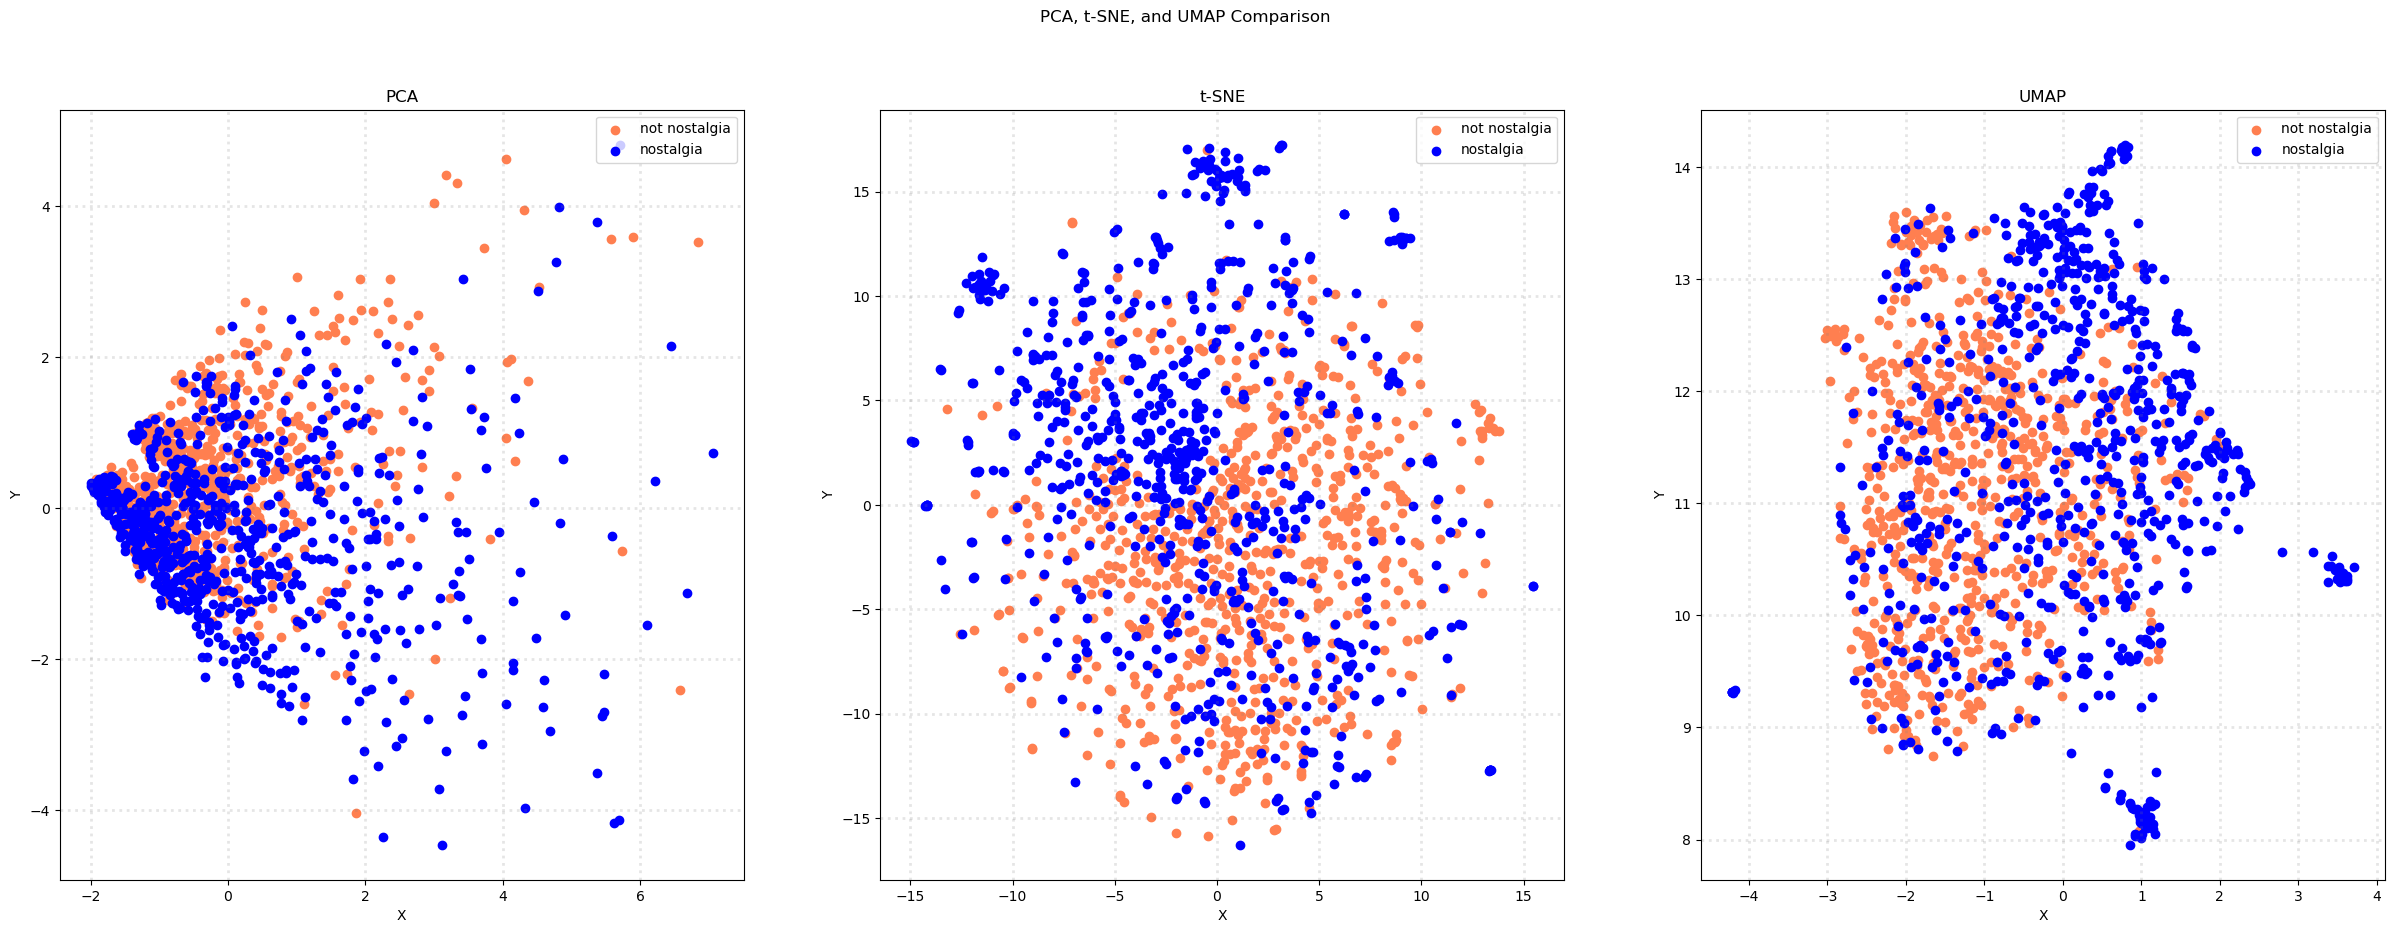

In [92]:
# Plot the results in subplots for PCA, t-SNE, and UMAP
col = ['coral', 'blue']
categories = data['sentiment'].unique()  

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        # Get the indices for the current category
        indices = data['sentiment'] == category
        xs = X_reduced[indices][:, 0]  # X-coordinates
        ys = X_reduced[indices][:, 1]  # Y-coordinates
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [93]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Feature Extraction with Bigrams and Trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['comment'])

# Applying Dimensionality Reduction to 3D
X_pca_3d = PCA(n_components=3).fit_transform(X.toarray())
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(X.toarray())
X_umap_3d = umap.UMAP(n_components=3).fit_transform(X.toarray())

# 3D Plotting
col = ['coral', 'blue'] 
categories = data['sentiment'].unique() 

fig = plt.figure(figsize=(20, 10))  # Create a figure for 3D plots

# Function to create a 3D scatter plot
def plot_3d_scatter(X_reduced, title):
    ax = fig.add_subplot(131, projection='3d')  
    for c, category in zip(col, categories):
        indices = data['sentiment'] == category
        xs = X_reduced[indices][:, 0]  # X-coordinates
        ys = X_reduced[indices][:, 1]  # Y-coordinates
        zs = X_reduced[indices][:, 2]  # Z-coordinates
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Plot for PCA
plot_3d_scatter(X_pca_3d, 'PCA')

# Change angle and plot for t-SNE
ax = fig.add_subplot(132, projection='3d')  
for c, category in zip(col, categories):
    indices = data['sentiment'] == category
    xs = X_tsne_3d[indices][:, 0]
    ys = X_tsne_3d[indices][:, 1]
    zs = X_tsne_3d[indices][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('t-SNE')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Change angle and plot for UMAP
ax = fig.add_subplot(133, projection='3d')  
for c, category in zip(col, categories):
    indices = data['sentiment'] == category
    xs = X_umap_3d[indices][:, 0]
    ys = X_umap_3d[indices][:, 1]
    zs = X_umap_3d[indices][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('UMAP')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


### Discretization and Binarization

In [94]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [95]:
mlb = preprocessing.LabelBinarizer()

In [96]:
mlb.fit(data['sentiment'])

LabelBinarizer()

In [97]:
data['bin_sentiment'] = data['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})

In [98]:
data[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   comment_length  word_count  sentiment_code  \
0             290          60               0   
1             129          26               1   
2             369          74               1   
3             332          68               0   
4              67          13               1   
5             205          39               1   
6             131          27               1   
7             162          34               1   
8              40           8               0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment  bin_sentiment  
0  {was, singer, life., at, feel, Reeves, fan, He...              0  
1  {was, when, ever, listened, singing, forgotten...              1  
2  {was, no, find, think, sweet,, at, comforting,...              1  
3  {man, 1st, 2nd, when, This, day, December, is,...              0  
4  {played, reminds, everyday, to, who, me, songs...              1  
5  {me, child,, reminded, cry....because, funeral...              1  
6  {was, Time, when, me, do, teenager, the, liste...              1  
7  {tunes, comes, HAVE, music., me, now, am, sinc...              1  
8        {you, in, heart, always, are, my, Wherever}              0

### Data Exploration

In [99]:
import random

# Retrieve 3 random YouTube comments from the dataset

document_to_transform_1 = []
random_record_1 = data.iloc[50]  
random_record_1 = random_record_1['comment']  
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100] 
random_record_2 = random_record_2['comment']  
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150] 
random_record_3 = random_record_3['comment']  
document_to_transform_3.append(random_record_3)


In [100]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [101]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### Data Classification

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment
sentiment_mapping = dict(data[['sentiment', 'sentiment_code']].drop_duplicates().values)

# Correctly create target names from the mapping
target_names = [sentiment for sentiment, code in sorted(sentiment_mapping.items(), key=lambda item: item[1])]

# Split the data into training and testing sets (70% train, 30% test)
# X is the document-term matrix
X = CountVectorizer().fit_transform(data['comment'])  # Change this to your actual comment column
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [120]:
# helper function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

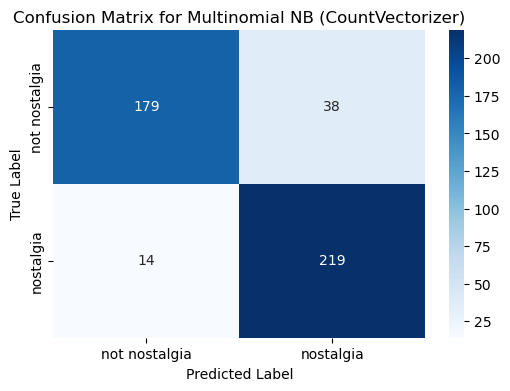

In [128]:
plot_confusion_matrix(y_test, y_pred, "Multinomial NB (CountVectorizer)")

In [114]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB  
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment
sentiment_mapping = dict(data[['sentiment', 'sentiment_code']].drop_duplicates().values)

# Correctly create target names from the mapping
target_names = [sentiment for sentiment, code in sorted(sentiment_mapping.items(), key=lambda item: item[1])]

# Split the data into training and testing sets (70% train, 30% test)
# X is the document-term matrix
X = CountVectorizer(binary=True).fit_transform(data['comment'])  # Bernoulli Naive Bayes expects binary inputs
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment_code'], test_size=0.3, random_state=42)

# Train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))



Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9275    0.8249    0.8732       217
    nostalgia     0.8521    0.9399    0.8939       233

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



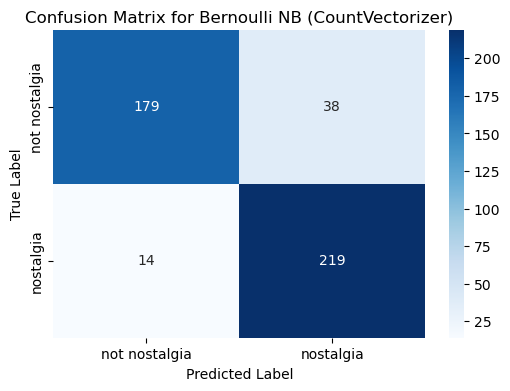

In [127]:
plot_confusion_matrix(y_test, y_pred, "Bernoulli NB (CountVectorizer)")

In [115]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment
sentiment_mapping = dict(data[['sentiment', 'sentiment_code']].drop_duplicates().values)

# Correctly create target names from the mapping
target_names = [sentiment for sentiment, code in sorted(sentiment_mapping.items(), key=lambda item: item[1])]

# Split the data into training and testing sets (70% train, 30% test)
# X is the TF-IDF document-term matrix
X = TfidfVectorizer().fit_transform(data['comment'])  # Use TF-IDF for feature extraction
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8132    0.9528    0.8775       233
    nostalgia     0.9379    0.7650    0.8426       217

     accuracy                         0.8622       450
    macro avg     0.8755    0.8589    0.8601       450
 weighted avg     0.8733    0.8622    0.8607       450



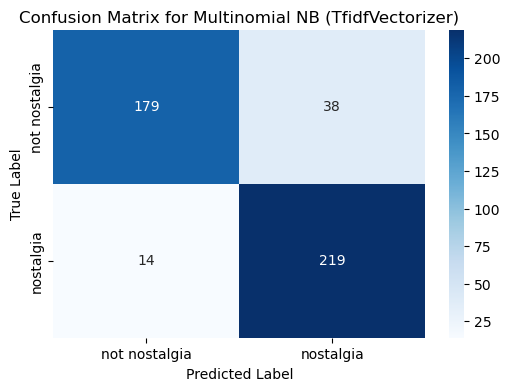

In [126]:
plot_confusion_matrix(y_test, y_pred, "Multinomial NB (TfidfVectorizer)")

In [118]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  # Change to TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment
sentiment_mapping = dict(data[['sentiment', 'sentiment_code']].drop_duplicates().values)

# Correctly create target names from the mapping
target_names = [sentiment for sentiment, code in sorted(sentiment_mapping.items(), key=lambda item: item[1])]

# Split the data into training and testing sets (70% train, 30% test)
# X is the TF-IDF document-term matrix
X = TfidfVectorizer().fit_transform(data['comment'])  # Bernoulli Naive Bayes expects binary inputs
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment_code'], test_size=0.3, random_state=42)

# Train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9275    0.8249    0.8732       217
    nostalgia     0.8521    0.9399    0.8939       233

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



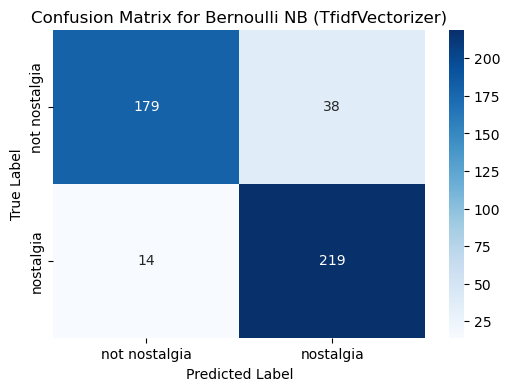

In [125]:
plot_confusion_matrix(y_test, y_pred, "Bernoulli NB (TfidfVectorizer)")

Bernoulli Naive Bayes is used for binary data while Multinomial Naive Bayes is used for data that represents frequencies. Bernoulli Naive Bayes is suitable for the concern of whether a word appears or not while Multinomial Naive Bayes is suitable for text classification tasks where the frequencies of words matter.

Bernoulli Naive Bayes gets a higher accuracy in this dataset compared to Multinomial Naive Bayes. This might be due to the sentiment classification being more sensitive to the presence of specific terms to classify whether it is nostalgia or not. For example, the words like old, remember, and memories can clearly indicate that the comment is nostalgic, despite how many times they appear in the comment.

### Improvement for Data Preprocessing in Lab 1 

In [129]:
# sampling
# Stratified sampling can be used instead fo random sampling to ensure the coverage of each categories.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)
for train_index, sample_index in split.split(X, X['category_name']):
    X_sample = X.loc[sample_index]


In [ ]:
# feature creation
# Convert all text to lowercase before tekenizing as tokenization is case sensitive by default
X['text'] = X['text'].str.lower()

In [ ]:
# frequent pattern mining process
# Define a helper function to analyse different database
def analyse_database(file_path):
    obj = tds.TransactionalDatabase(file_path)
    obj.run()
    obj.printStats()
    obj.plotGraphs()

In [ ]:
# dimensionality reduction
# Normalise the data before applying dimensinality reduction
from sklearn.preprocessing import StandardScaler
tdm_df_scaled = StandardScaler().fit_transform(tdm_df.values)
